<a href="https://colab.research.google.com/github/rhythmMachineCoder/colab-files/blob/main/supportVectorRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SUPPORT VECTOR REGRESSION**

# **Important the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# **Importing the dataset**

In [ ]:
dataset = pd.read_csv('Position_Salaries.csv')

In [ ]:
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [ ]:
# in order to apply feauture scaling
# feature scaling take 2d vector
y = y.reshape(len(y),1)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
sc_y = StandardScaler()
y= sc_y.fit_transform(y)


In [ ]:
x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [ ]:
print(x,' ',y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]   [[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# *Training the dataset using the SVR *

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

In [ ]:
x = sc_x.inverse_transform(x)
y  = sc_y.inverse_transform(y)

In [ ]:
x

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

In [ ]:
y

array([[  45000.],
       [  50000.],
       [  60000.],
       [  80000.],
       [ 110000.],
       [ 150000.],
       [ 200000.],
       [ 300000.],
       [ 500000.],
       [1000000.]])

# **visualizing the svr curve **

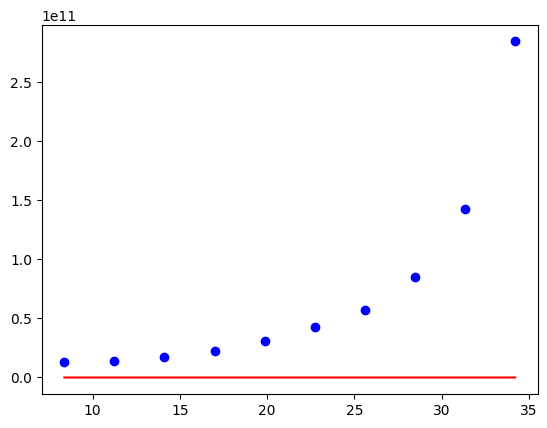

In [ ]:
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)),color='r')
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y).reshape(-1,1),color='blue')
plt.show()